<a href="https://colab.research.google.com/github/asmasw6/Agriculture-Crop-Yield-Prediction/blob/main/Crop_Yield_Prediction_98_58_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px

In [2]:
df = pd.read_csv('/content/yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [4]:
# Summary Statistics for Numerical Variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.0,14120.500000,8152.907488,0.00,7060.2500,14120.50,21180.75,28241.00
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [5]:
# Summary Statistics for Categorical Variables
df.describe(include='object')


,Area,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


Area: There are 101 unique countries/areas, with India being the most frequent category, occurring 4048 times out of 28242 entries.

Item: 10 unique types of crops are present. The most common type is "Potatoes", occurring 4276 times

#EDA

In [6]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [7]:
# remove countries with less than 100 record
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Algeria,Maize,1990,16500,89.0,1828.92,17.48
1,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
2,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
3,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
4,Algeria,Wheat,1990,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...,...
26292,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
26293,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
26294,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
26295,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [8]:
datacorr=df.copy()

In [9]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])


<Axes: >

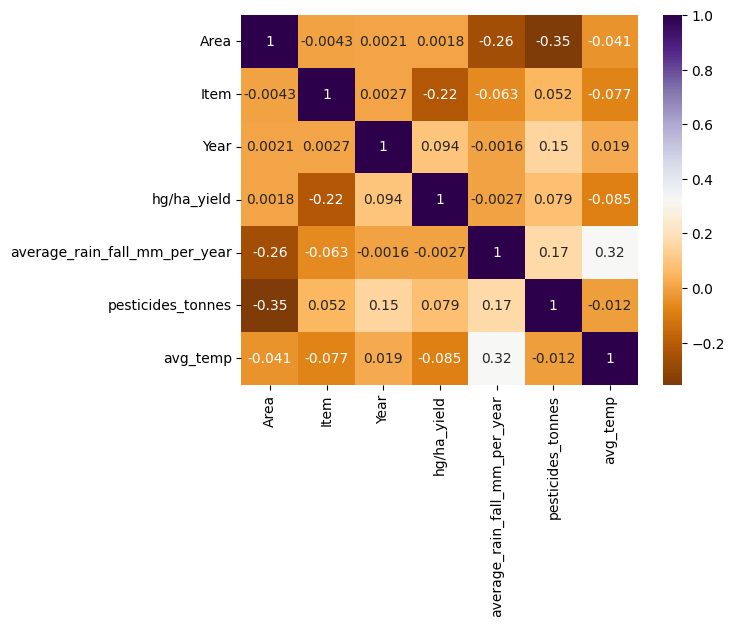

In [10]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

###Inferences:
Area: There's a strong correlation between Area and pesticides_tonnes, along with Area and average rainfall.

Items: There's a strong correlation between Item and hg/ha_yield

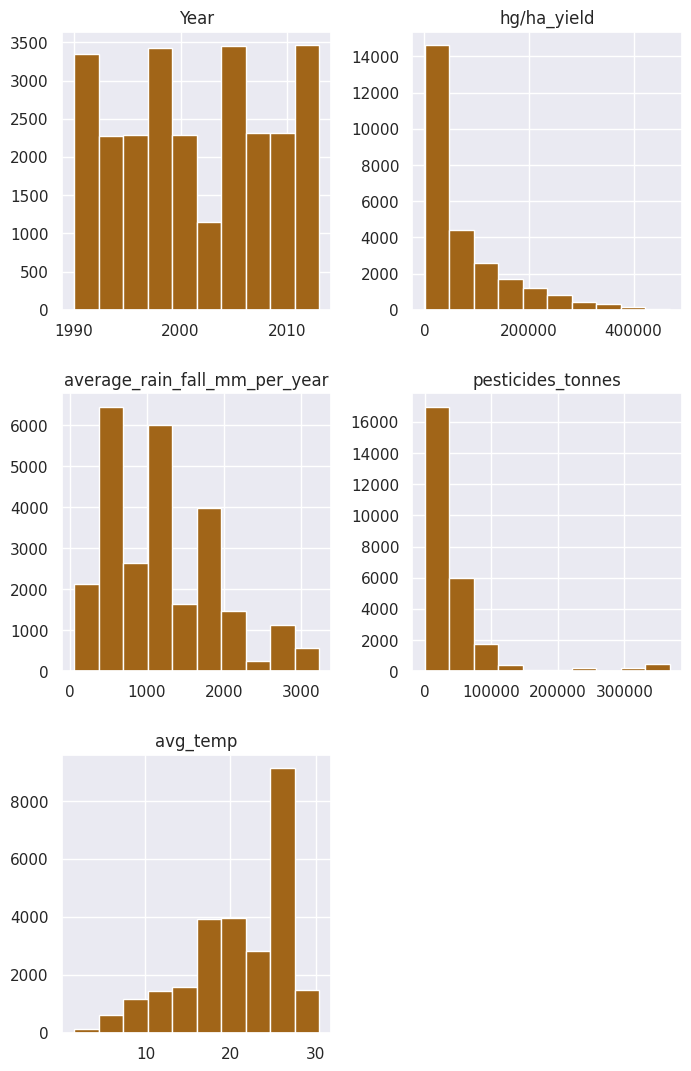

In [11]:
sns.set(palette='BrBG')
df.hist(figsize=(8,13));

###Inferences:
rainfall: Most rainfall is between 0-1000 and very few is around 3000

pesticides_tonnes: The majority of used pesticides is little to zero

avg_temp: Most average temperatures is around 25. *hg/ha yield: There is a vast majority of yield production around 0.

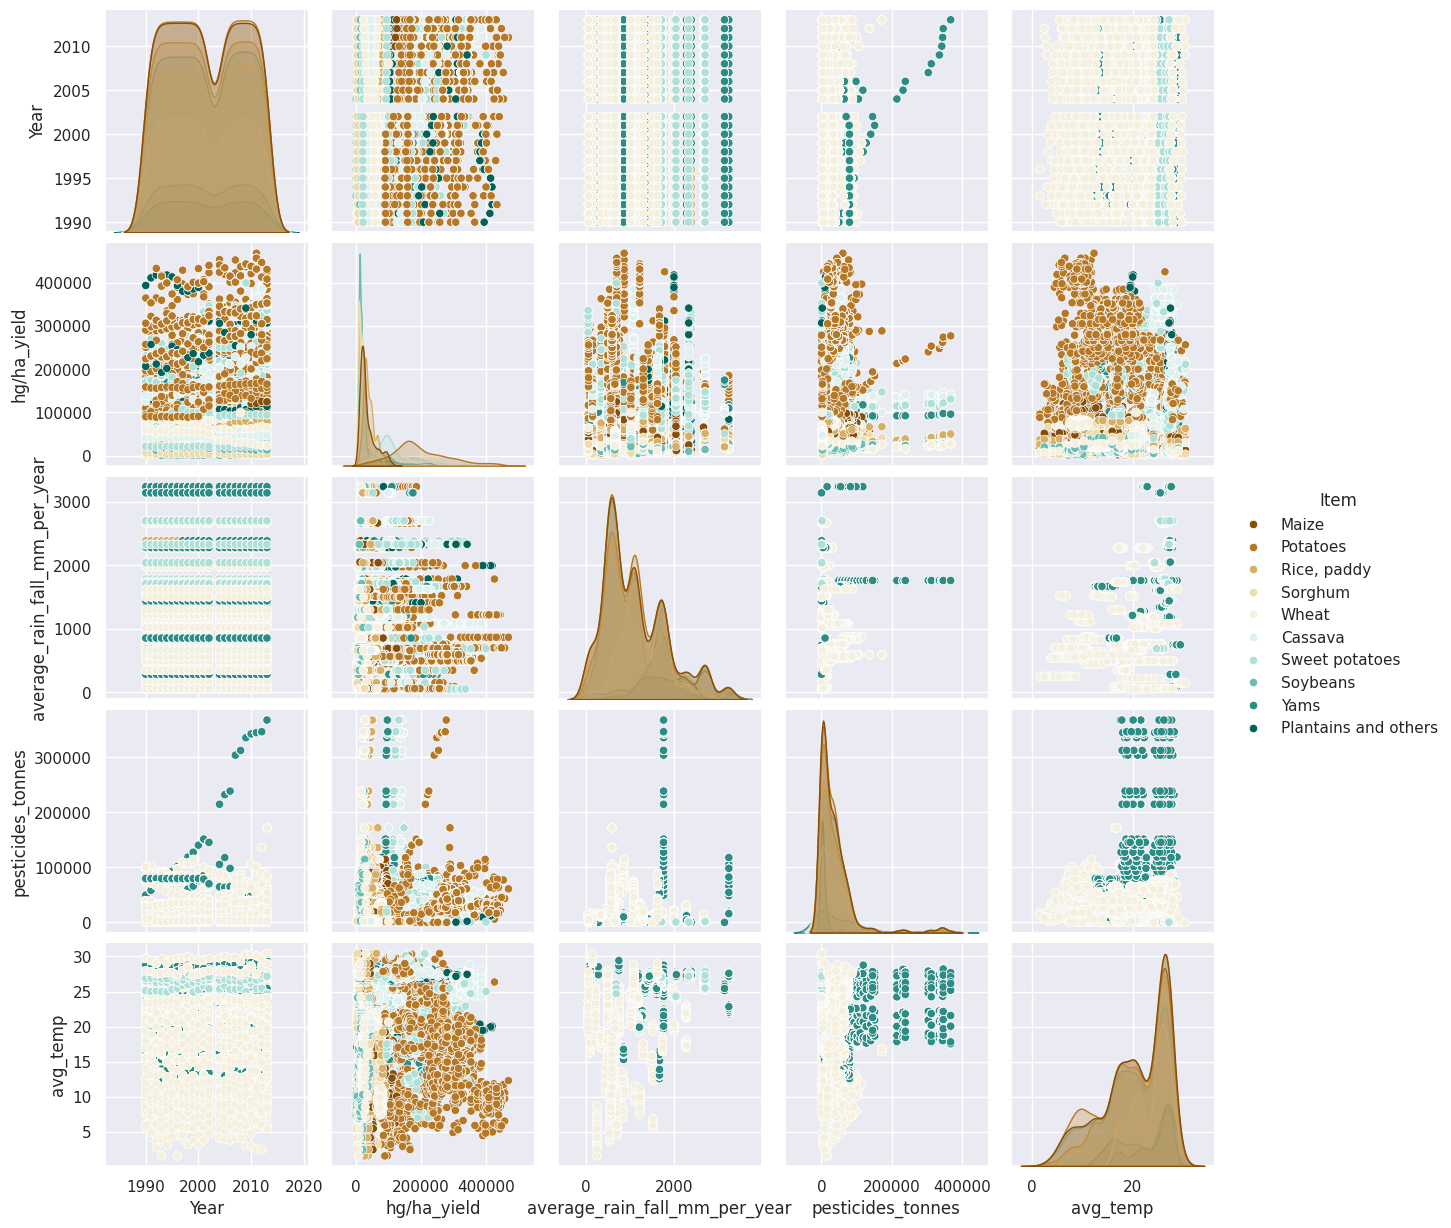

In [12]:
sns.pairplot(data=df,hue='Item',kind='scatter',palette='BrBG')


<Axes: xlabel='Year'>

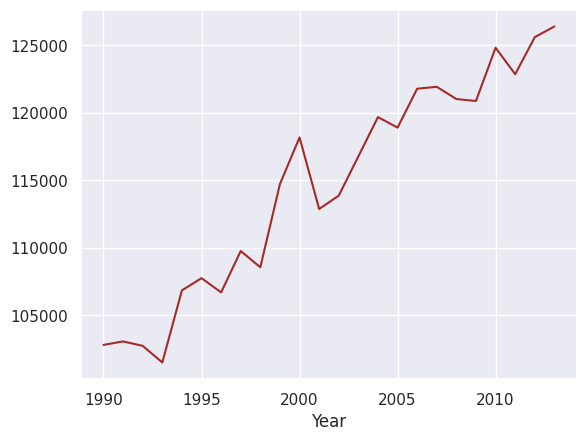

In [13]:
df2=df[df['Item']=='Yams']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')

###Inferences:
Items:

yams: It appears that yams uses a lot of pesticides, grow on all rainfall ranges.

wheat: Wheat thrives on all average temperature ranges and grows on average to no rainfall.

year:

2003-2013: Starting from 2003 to 2013, more and more pesticides were used on yams to increase its productivity.

hg/ha_yield: Sorghum and Soybeans are lowest in yield production while potatoes are most popular

In [14]:
len(df['Area'].unique())/7

10.142857142857142

In [15]:
areas_per_plot = 10

# Get unique areas
unique_areas = sorted(df['Area'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]

for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=True)
    display(dg.head())

hg/ha_yield
Area       Item                 
Angola     Sorghum   2926.769231
Azerbaijan Sorghum   3324.166667
Angola     Soybeans  4235.538462
           Maize     5753.869565
Azerbaijan Soybeans  7599.850000

hg/ha_yield
Area                     Item                  
Ecuador                  Wheat      7111.956522
Cameroon                 Soybeans   7566.782609
Central African Republic Sorghum    9353.913043
                         Maize     10250.869565
Cameroon                 Sorghum   11521.304348

hg/ha_yield
Area     Item                 
Honduras Wheat     5574.130435
Haiti    Maize     7905.565217
         Sorghum   8157.913043
Ghana    Sorghum  10291.347826
Honduras Sorghum  10863.782609

hg/ha_yield
Area       Item                 
Madagascar Soybeans  6267.173913
           Sorghum   6452.304348
Kenya      Sorghum   7744.478261
India      Sorghum   8452.434783
Libya      Wheat     8459.521739

,,hg/ha_yield
Area,Item,
Niger,Sorghum,2592.913043
Mauritania,Sorghum,4673.869565
Mozambique,Sorghum,4830.304348
Malawi,Sorghum,6403.086957
Morocco,Sorghum,6594.739130


,,hg/ha_yield
Area,Item,
Pakistan,Sorghum,6056.043478
Rwanda,Soybeans,6664.869565
Senegal,Sorghum,8159.173913
Pakistan,Soybeans,9276.000000
Rwanda,Sorghum,10969.478261


,,hg/ha_yield
Area,Item,
Tajikistan,Soybeans,941.750000
Zambia,Sorghum,6809.608696
Thailand,Wheat,7547.000000
Suriname,Soybeans,9039.869565
Sri Lanka,Sorghum,9177.521739


In [16]:
area_chunks

[['Algeria',
  'Angola',
  'Argentina',
  'Australia',
  'Azerbaijan',
  'Bangladesh',
  'Brazil',
  'Bulgaria',
  'Burkina Faso',
  'Burundi'],
 ['Cameroon',
  'Canada',
  'Central African Republic',
  'Chile',
  'Colombia',
  'Croatia',
  'Dominican Republic',
  'Ecuador',
  'Egypt',
  'El Salvador'],
 ['France',
  'Germany',
  'Ghana',
  'Greece',
  'Guatemala',
  'Guinea',
  'Guyana',
  'Haiti',
  'Honduras',
  'Hungary'],
 ['India',
  'Indonesia',
  'Iraq',
  'Italy',
  'Jamaica',
  'Japan',
  'Kazakhstan',
  'Kenya',
  'Libya',
  'Madagascar'],
 ['Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Mexico',
  'Morocco',
  'Mozambique',
  'Nepal',
  'Nicaragua',
  'Niger'],
 ['Pakistan',
  'Papua New Guinea',
  'Peru',
  'Portugal',
  'Romania',
  'Rwanda',
  'Saudi Arabia',
  'Senegal',
  'South Africa',
  'Spain'],
 ['Sri Lanka',
  'Suriname',
  'Tajikistan',
  'Thailand',
  'Turkey',
  'Uganda',
  'Ukraine',
  'United Kingdom',
  'Uruguay',
  'Zambia'],
 ['Zimbabwe']]

In [17]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=False)
    display(dg.head())

,,hg/ha_yield
Area,Item,
Australia,Potatoes,330944.826087
Argentina,Potatoes,262059.173913
Australia,Sweet potatoes,257610.826087
Brazil,Potatoes,196056.000000
Algeria,Potatoes,182413.956522


hg/ha_yield
Area        Item                               
Egypt       Sweet potatoes        261369.347826
            Potatoes              235444.956522
El Salvador Potatoes              211362.304348
            Plantains and others  198605.217391
Chile       Potatoes              184835.260870

hg/ha_yield
Area      Item                               
France    Potatoes              395037.260870
Germany   Potatoes              386553.347826
Guatemala Plantains and others  291096.304348
          Potatoes              241157.869565
Hungary   Potatoes              210372.782609

hg/ha_yield
Area  Item                         
Japan Potatoes        311005.260870
India Cassava         282234.434783
Italy Potatoes        237861.347826
Japan Sweet potatoes  237639.391304
      Yams            211343.434783

,,hg/ha_yield
Area,Item,
Mexico,Potatoes,228553.695652
Morocco,Potatoes,217065.695652
Mauritius,Potatoes,211356.869565
Mali,Potatoes,195653.869565
Mexico,Sweet potatoes,194611.913043


,,hg/ha_yield
Area,Item,
South Africa,Potatoes,297195.434783
Spain,Potatoes,251421.695652
Saudi Arabia,Potatoes,223336.652174
Senegal,Potatoes,180499.608696
Papua New Guinea,Yams,172521.173913


hg/ha_yield
Area           Item                               
United Kingdom Potatoes              406131.695652
Turkey         Potatoes              265486.565217
Suriname       Plantains and others  253966.913043
               Cassava               191282.478261
Tajikistan     Potatoes              176549.190476

In [18]:
dk=df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
dk.sort_values(by=['hg/ha_yield'],ascending=False)


,,hg/ha_yield
Area,Item,
United Kingdom,Potatoes,406131.695652
France,Potatoes,395037.260870
Germany,Potatoes,386553.347826
Australia,Potatoes,330944.826087
Japan,Potatoes,311005.260870
...,...,...
Zimbabwe,Sorghum,3864.956522
Azerbaijan,Sorghum,3324.166667
Angola,Sorghum,2926.769231


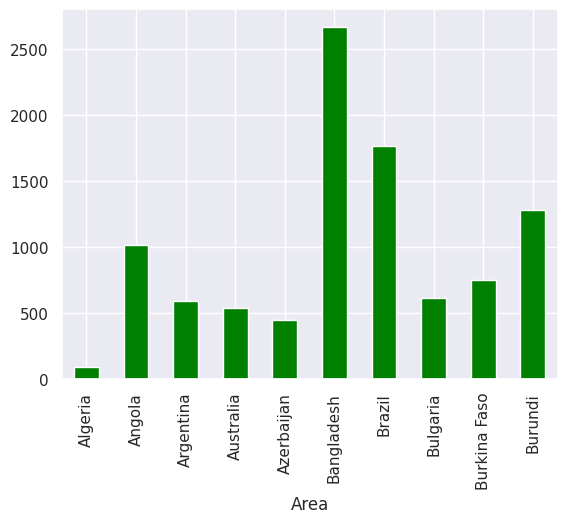

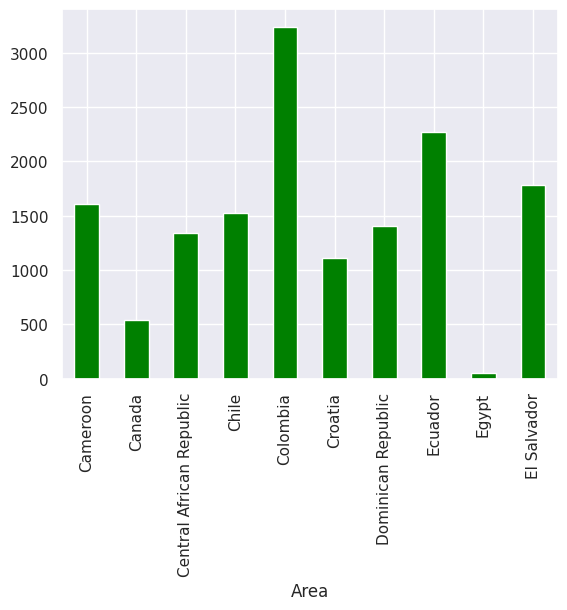

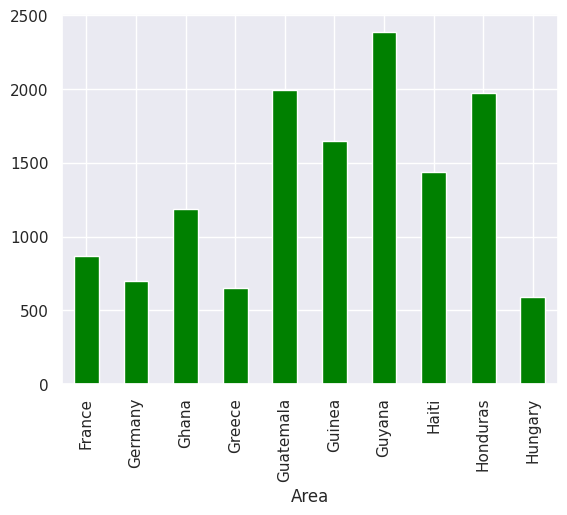

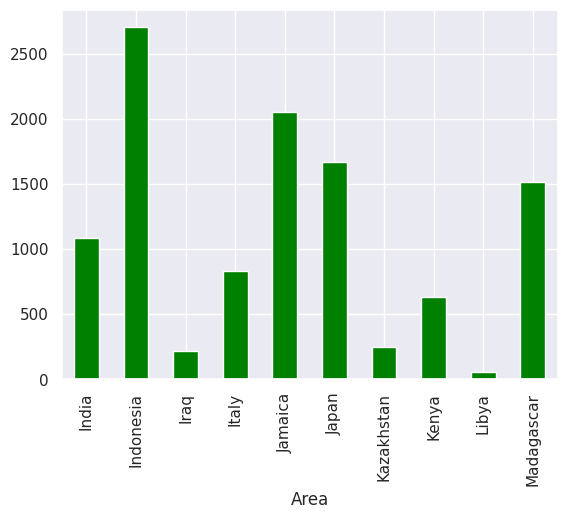

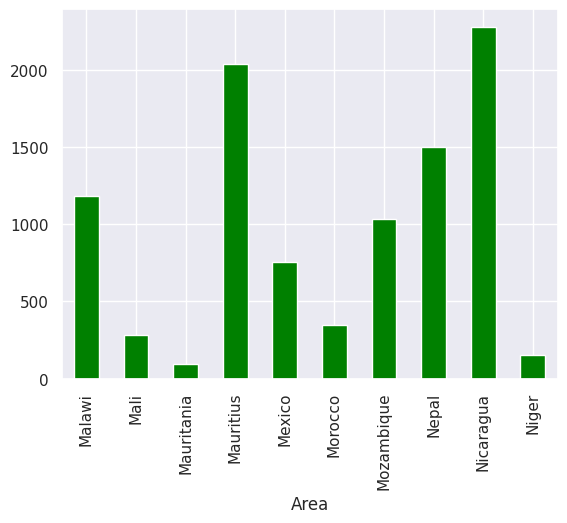

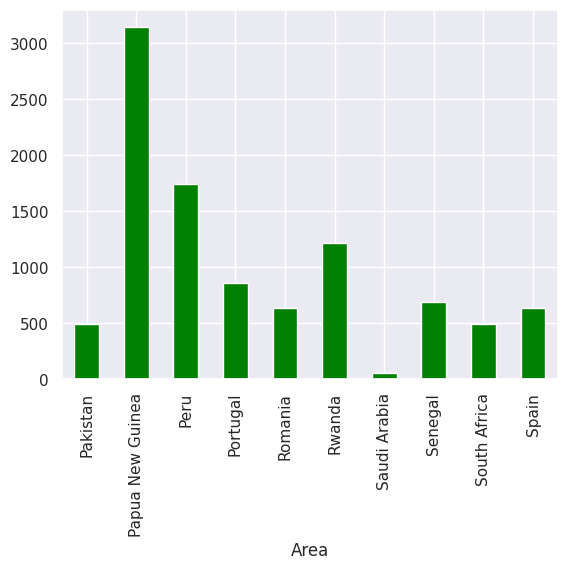

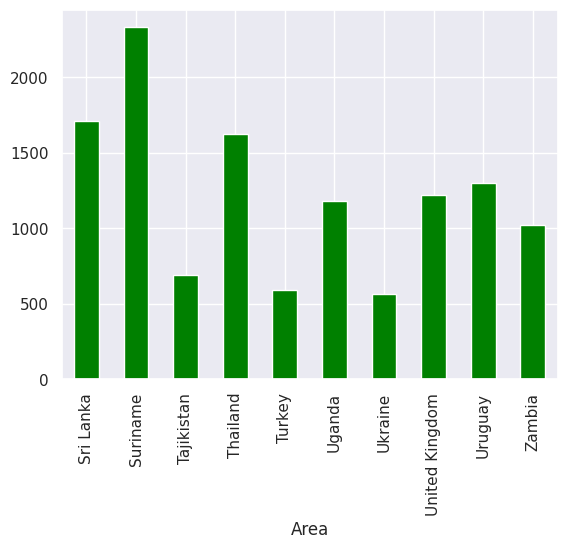

In [19]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['average_rain_fall_mm_per_year'].mean().plot(kind='bar',rot=0,color="g")
    plt.xticks(rotation=90)
    plt.show()

Inferences:

Top rainfall countries: Bangladesh, Colombia, Guyana, Indonesia, Nicaragua, Papua New Guinea, Ecuador, and Suriname have rainfall with over 2000 mm.

Least rainfall countries: Saudi Arabia, Pakistan, South Africa, Mali, Mauritania, Morocco, Niger, Libya, Iraq, Egypt, Azerbaijan,and Algeria have rainfall with less than 500 mm

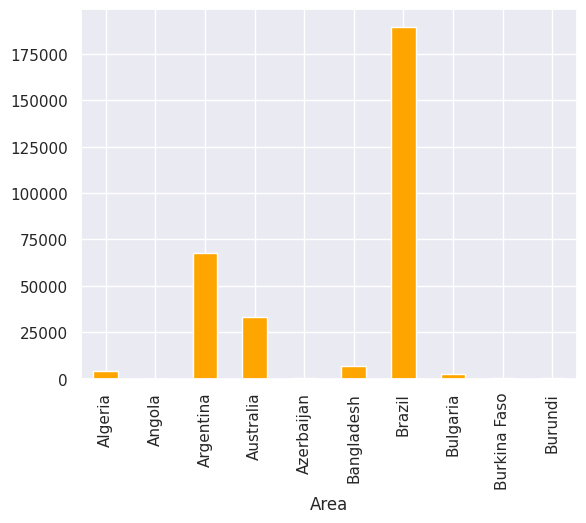

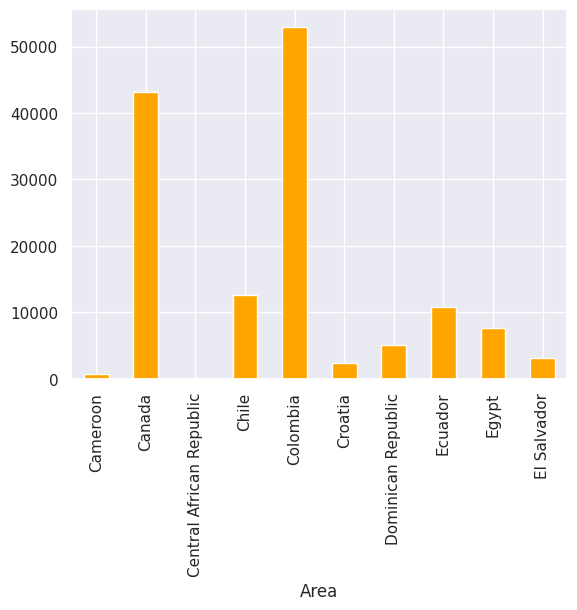

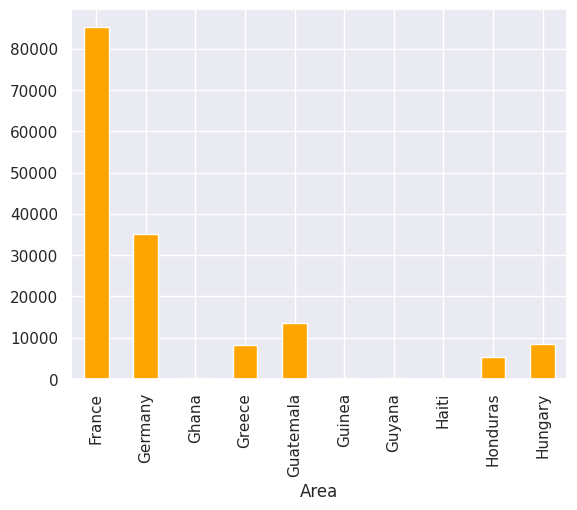

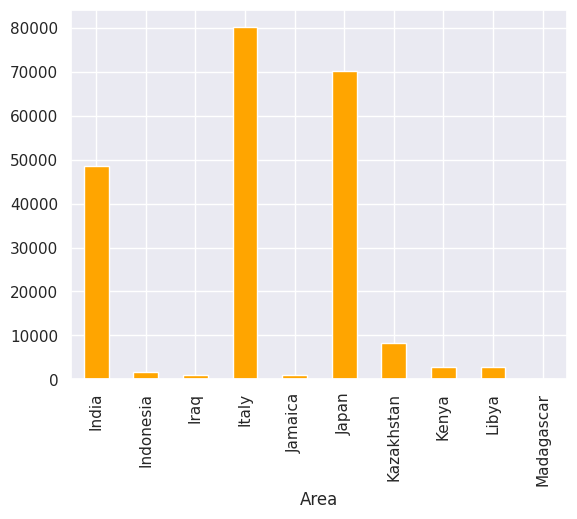

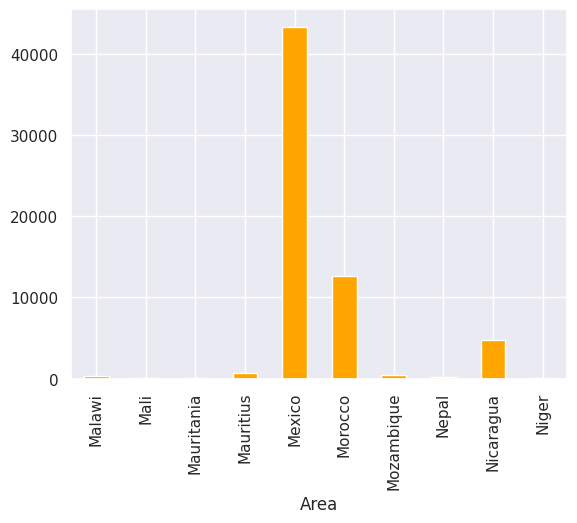

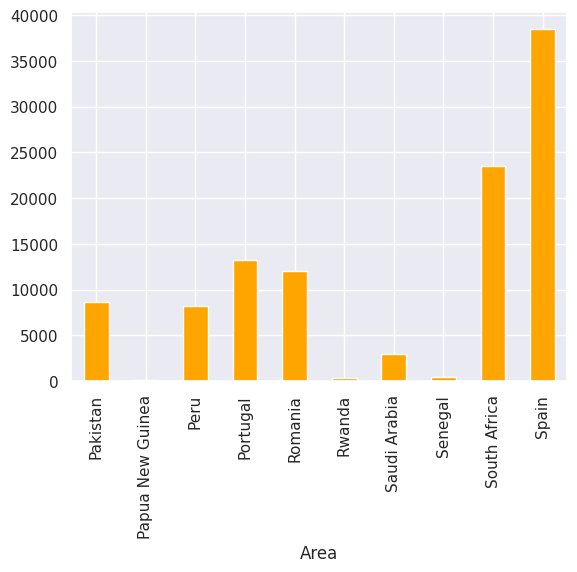

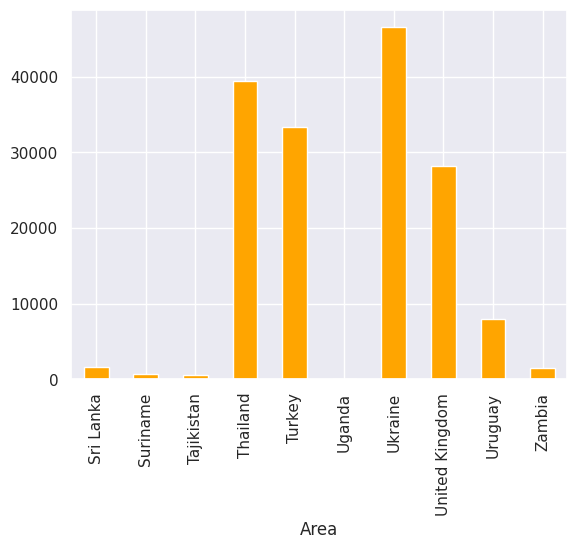

In [20]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['pesticides_tonnes'].mean().plot(kind='bar',rot=0,color="orange")
    plt.xticks(rotation=90)
    plt.show()

Top pesticides using countries: Brazil, Italy, Argentina

  France: For a high yield producing country, using over 80000 tonnes of pesticides could be harmful.

  Japan: Another high producing country using over 60000 tonnes of pesticides.

Least pesticides using countries: Algeria, Angola, Azerbaijan, Bulgaria, Burkina Faso, Burundi, Cameroon, Cenrral African Republic, Croatia, Egypt, El Salvador,Greece, Guinea, Guyana, Haiti, Honduras, Hungary, Indonesia, Iraq, Jamaica, Kenya, Kazakhstan, Libya, Madagascar, Malawi, Mali, Mauritana, Mauritius, Mozambique, Nepal, Niger, Papua New Guinea, Rwanda, Senegal, Saudi Arabia, Sri Lanka, Suriname, Tajikistan, Uganda, Zambia, Zimbabwe, Uruguay have been using pesticides with less than 10000 tonnes

All poorly producing yield countries are included in least pesticides usage countries

Germany, Australia, and United Kingdom are top producing countries and they use an average amount of pesticides around 30000 tonnes

## Now this begs the question; do pesticides affect yield production?


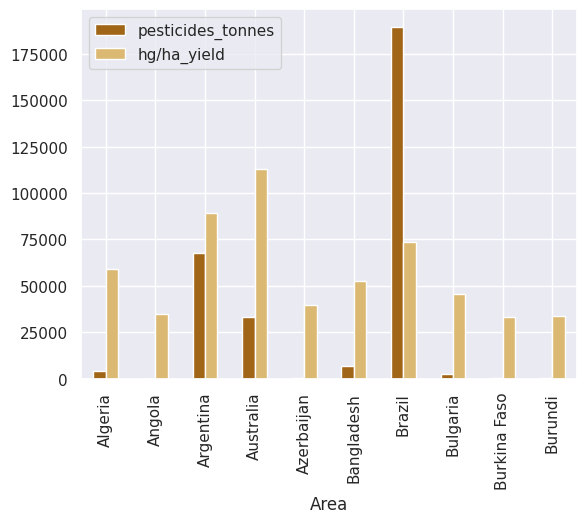

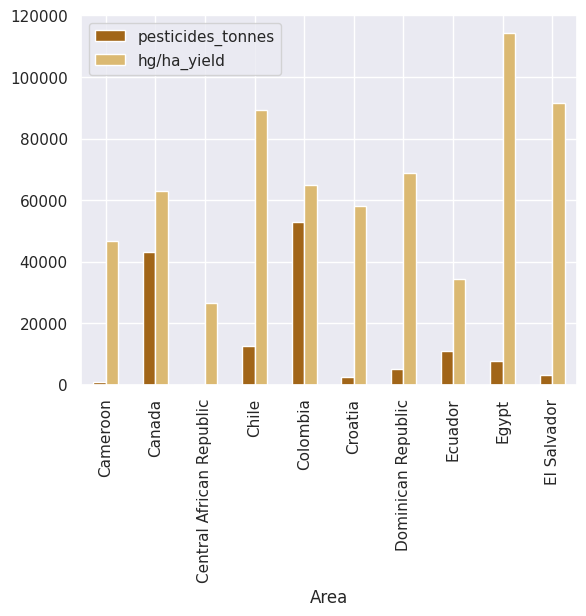

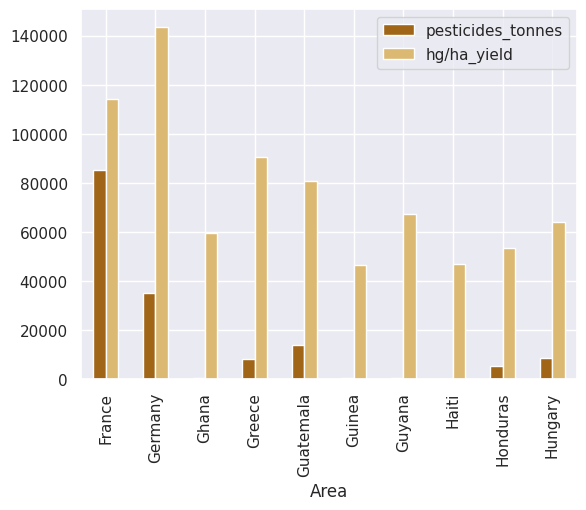

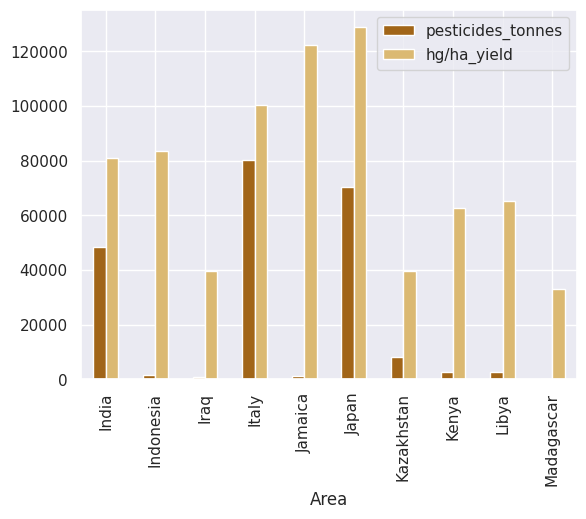

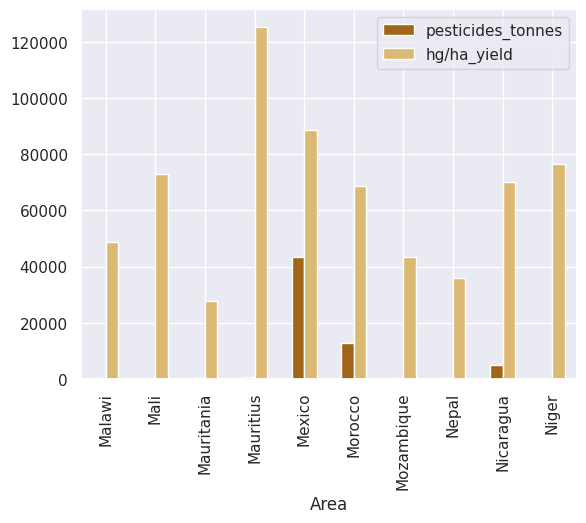

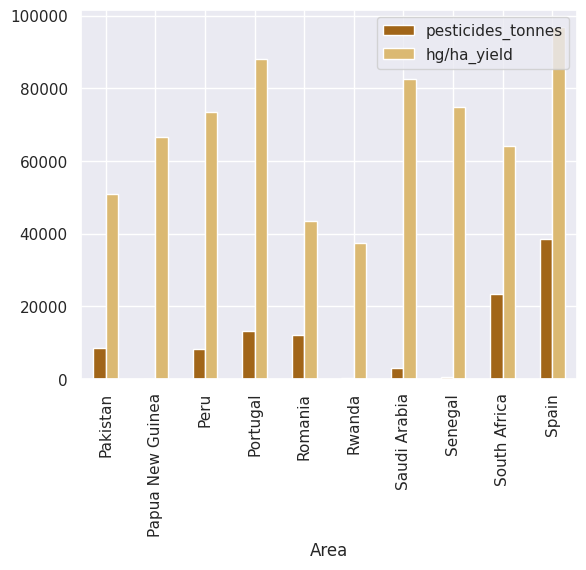

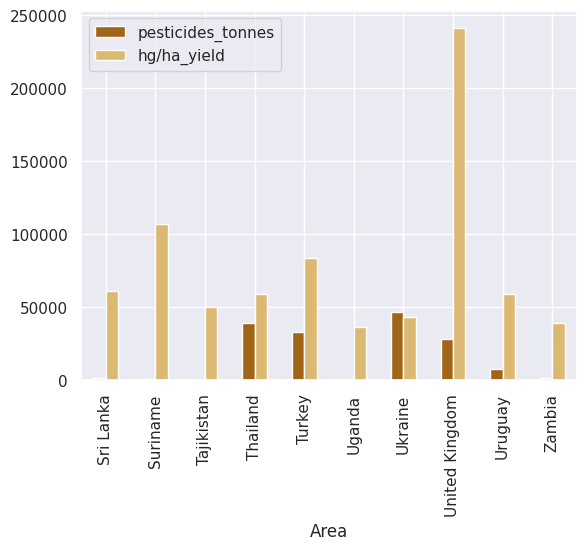

In [21]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby('Area')[['pesticides_tonnes', 'hg/ha_yield']].mean().plot(kind='bar',rot=0)
    plt.xticks(rotation=90)
    plt.show()

In [22]:
px.scatter(df, x='hg/ha_yield', y='pesticides_tonnes',color="Area")

/tmp/ipython-input-23-3767856135.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




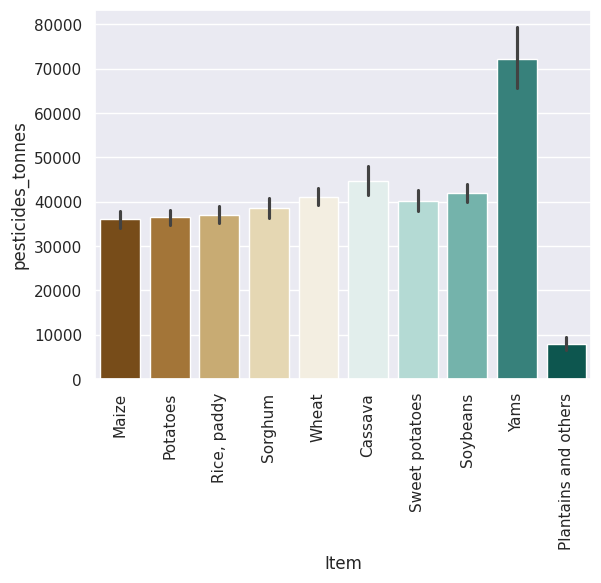

In [23]:
sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

Inferences:

Top pesticides used on items: Yams

Least pesticides used on items: Plantains and others

/tmp/ipython-input-24-2066341738.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Item', ylabel='hg/ha_yield'>

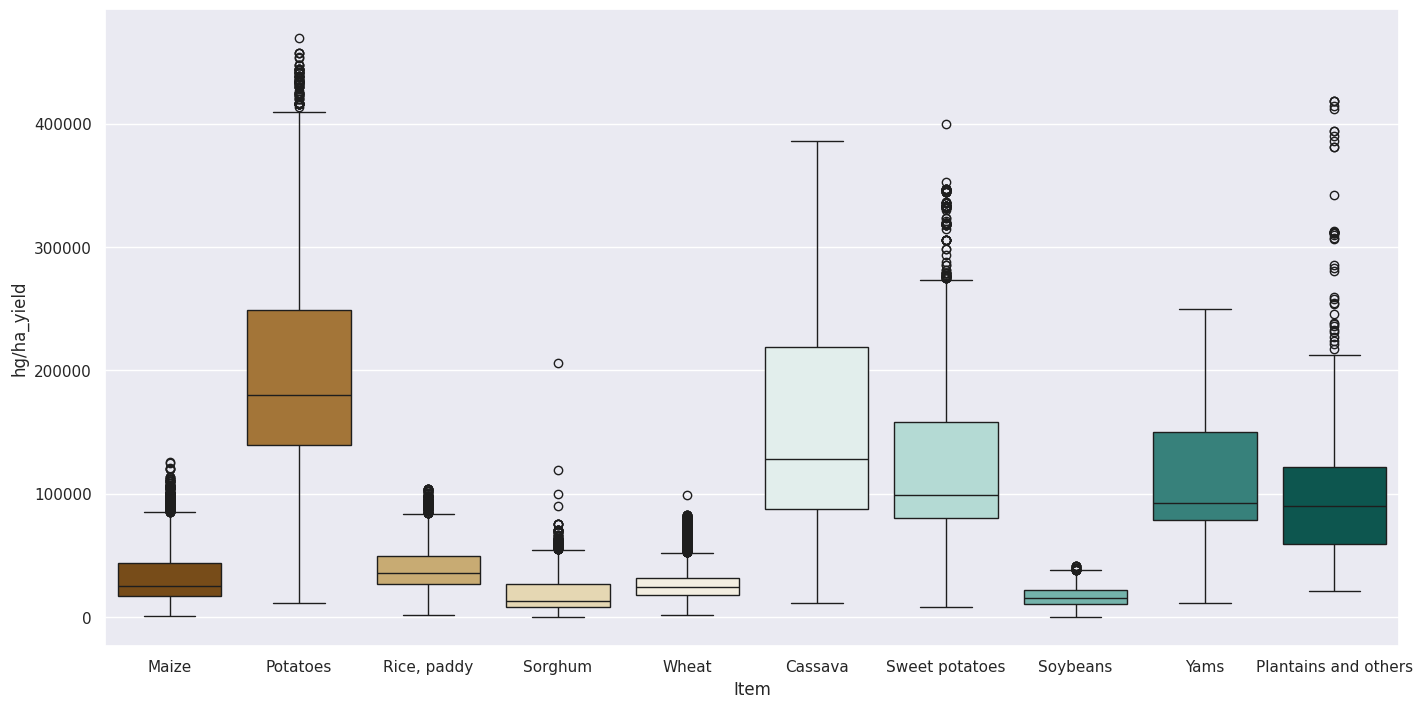

In [24]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="BrBG",data=df,ax=ax)

Inferences:

Top producing items: potatoes, cassava

Least producing items: soybeans, sorghum, wheat, maize, and rice, paddy

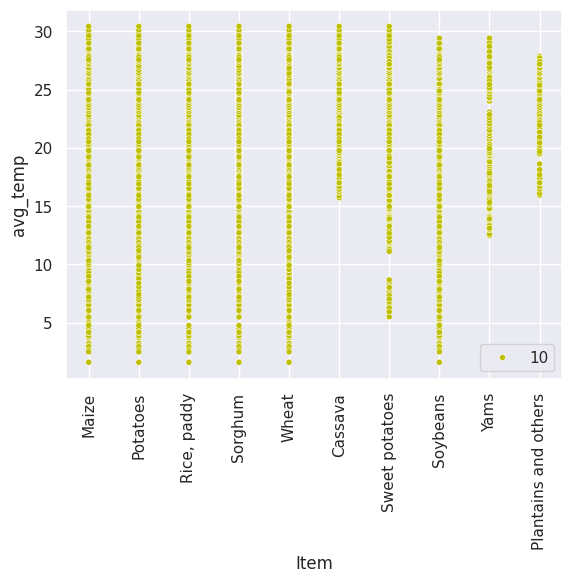

In [25]:
sns.scatterplot(x = 'Item', y = 'avg_temp', data = df,size=10,color='y')
plt.xticks(rotation=90);

Inferences:

Cassava, Yams, and Plantains and others need more than 15 avg temperature to grow

all other items can grow at any temperature range

In [26]:
grouped = df.groupby('Item')
grouped.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Algeria,Maize,1990,16500,89.0,1828.92,17.48
1,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
2,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
3,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
4,Algeria,Wheat,1990,6315,89.0,1828.92,17.48
5,Algeria,Maize,1991,19231,89.0,2461.80,16.26
6,Algeria,Potatoes,1991,90747,89.0,2461.80,16.26
7,Algeria,"Rice, paddy",1991,26786,89.0,2461.80,16.26
8,Algeria,Sorghum,1991,24231,89.0,2461.80,16.26
9,Algeria,Wheat,1991,10809,89.0,2461.80,16.26


In [27]:
grouped = df.groupby('Item')

best_areas = []

for item, group in grouped:
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]

    area = max_production_row['Area'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]

    best_areas.append({'Item': item, 'Area': area, 'hg/ha_yield': production})

best_areas_df = pd.DataFrame(best_areas)

best_areas_df

,Item,Area,hg/ha_yield
0,Cassava,India,385818
1,Maize,Tajikistan,125670
2,Plantains and others,Guatemala,418505
3,Potatoes,France,468991
4,"Rice, paddy",Australia,103895
5,Sorghum,Algeria,206000
6,Soybeans,Turkey,41609
7,Sweet potatoes,Senegal,400000
8,Wheat,Zambia,99387
9,Yams,Mali,250000


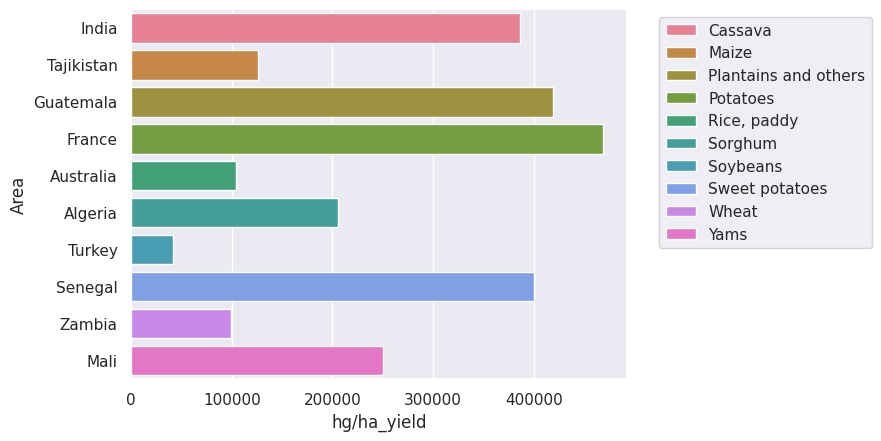

In [28]:
ax=sns.barplot(data=best_areas_df,x='hg/ha_yield',y='Area',hue='Item')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Inferences:
Cassava: India is the top at producing Cassava

Maize: Tajikistan excels at growing Maize

PLantains and others: Guatemala is the best source of PLantains and others

Potatoes: France is the top at producing potatoes

Rice, paddy: Australia is the leading country in producing rice, paddy

Sorghum: Algeria excels at producing sorghum

Soybeans: Turkey is unrivalled in producing soybeans

Sweet potatoes: Senegal is the best at producing sweet potatoes

Wheat: Zambbia surpasses every country at producing wheat

Yams: Mali outshines all countries in growing yams

# Model building and evaluation



In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [32]:
X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


The accuracy of the Linear Regression Model Train is 7.39
The accuracy of the  Linear Regression Model Test is 7.37


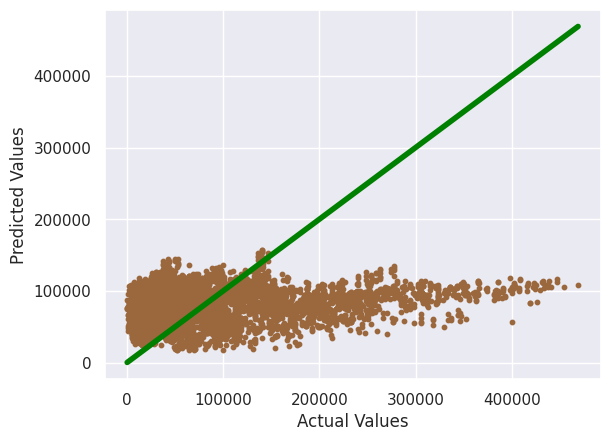

The accuracy of the Random Forest Model Train is 99.80
The accuracy of the  Random Forest Model Test is 98.56


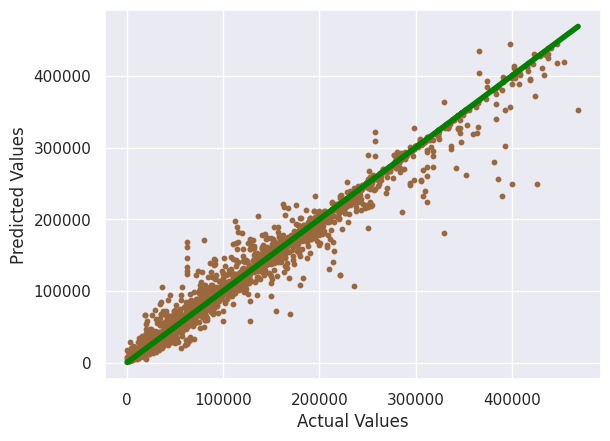

The accuracy of the Gradient Boost Model Train is 84.47
The accuracy of the  Gradient Boost Model Test is 83.11


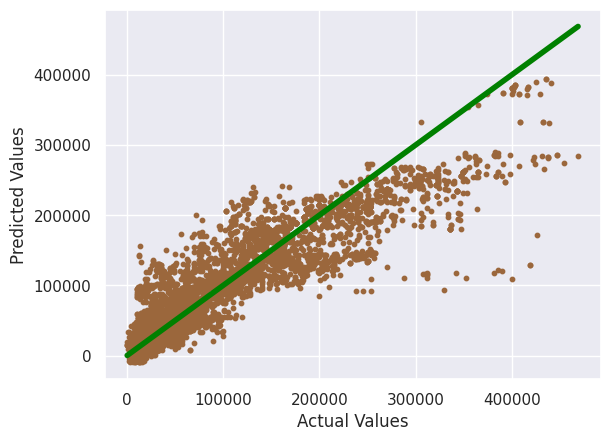

The accuracy of the XGBoost Model Train is 98.82
The accuracy of the  XGBoost Model Test is 97.43


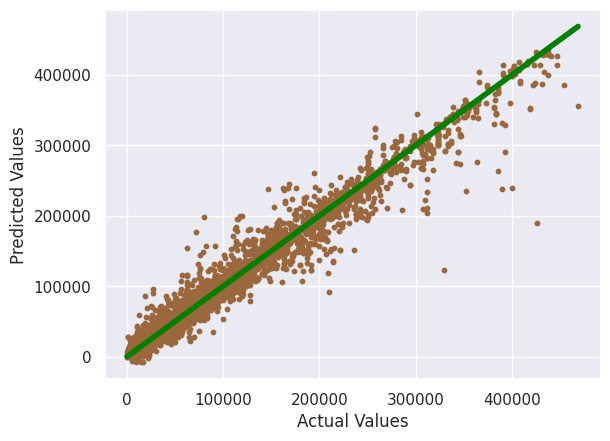

The accuracy of the KNN Model Train is 56.72
The accuracy of the  KNN Model Test is 28.82


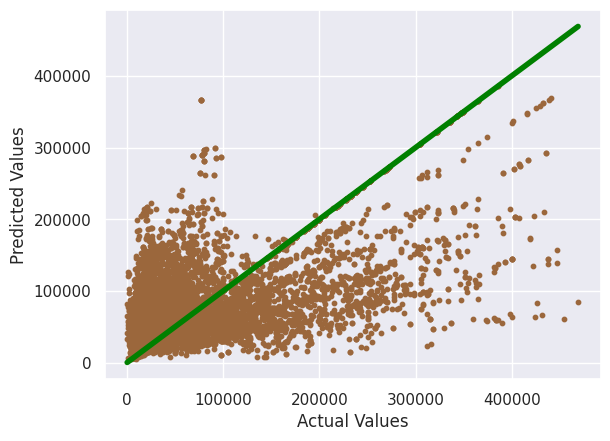

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 97.62


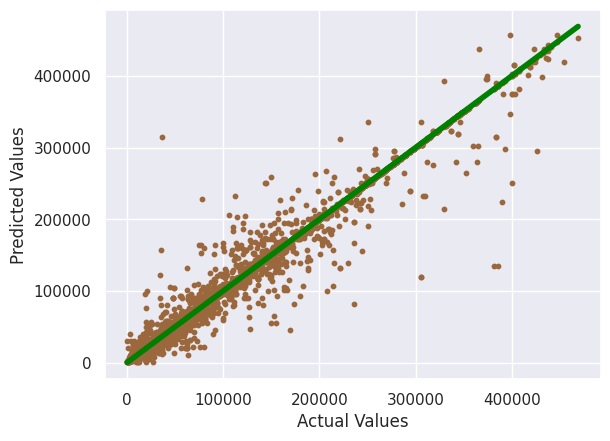

The accuracy of the Bagging Regressor Model Train is 99.81
The accuracy of the  Bagging Regressor Model Test is 98.59


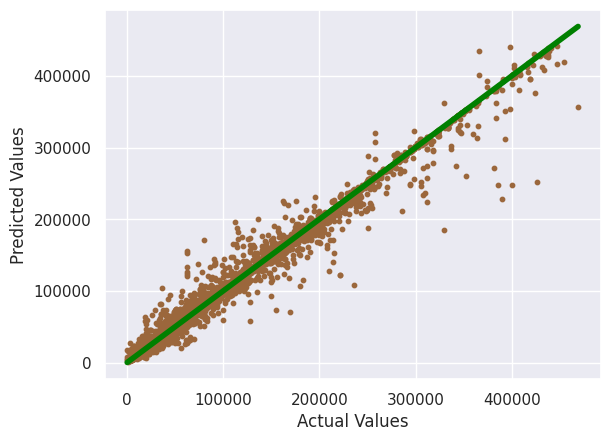

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.073724,6293718529.871188,0.073724
1,Random Forest,0.985628,97654323.573225,0.985628
2,Gradient Boost,0.831140,1147345777.258148,0.831140
3,XGBoost,0.974317,174504240.000000,0.974317
4,KNN,0.288206,4836388296.236208,0.288206
5,Decision Tree,0.976174,161890347.543726,0.976174
6,Bagging Regressor,0.985881,95933983.565644,0.985881


In [34]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)

#Kefold

In [40]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)*100
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))

    print(name)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf)

    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score}")

    mean_score = np.mean(scores)
    print(f"Mean Score: {mean_score}")
    print('-'*30)


df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
df_styled_best = df.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE','MAE','MAPE'], color='blue').highlight_max(subset=['MSE','MAE','MAPE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)

Linear Regression
Fold 1: 0.07498156475989182
Fold 2: 0.07210400021160523
Fold 3: 0.0784292144418346
Fold 4: 0.07038773134745946
Fold 5: 0.07066356115390804
Mean Score: 0.07331321438293983
------------------------------
Random Forest
Fold 1: 0.9865126813570899
Fold 2: 0.9867172836282233
Fold 3: 0.9896028642281417
Fold 4: 0.9894372060243757
Fold 5: 0.9873501119075837
Mean Score: 0.987924029429083
------------------------------
Gradient Boost
Fold 1: 0.8405283848723298
Fold 2: 0.8461533900211765
Fold 3: 0.840050458448555
Fold 4: 0.8361593608224641
Fold 5: 0.834140736809956
Mean Score: 0.8394064661948963
------------------------------
XGBoost
Fold 1: 0.9786474108695984
Fold 2: 0.9789465665817261
Fold 3: 0.9783259034156799
Fold 4: 0.9757775068283081
Fold 5: 0.9796527624130249
Mean Score: 0.9782700300216675
------------------------------
KNN
Fold 1: 0.32283304560469384
Fold 2: 0.3335010635863793
Fold 3: 0.3290297031014269
Fold 4: 0.32221628800788016
Fold 5: 0.35931922432452557
Mean Score: 0

,Model,Accuracy,MSE,MAE,MAPE,R2_score
0,Linear Regression,7.372439,6293718529.871188,60955.317749,2.419536,0.073724
1,Random Forest,98.562776,97654323.573225,3480.841065,0.102571,0.985628
2,Gradient Boost,83.113983,1147345777.258148,21184.660834,0.596784,0.831140
3,XGBoost,97.431743,174504240.000000,7073.086914,0.198378,0.974317
4,KNN,28.820641,4836388296.236208,47716.358935,1.631186,0.288206
5,Decision Tree,97.617385,161890347.543726,3559.269202,0.096101,0.976174
6,Bagging Regressor,98.588095,95933983.565644,3450.508398,0.101199,0.985881


#### Rerence >> https://www.kaggle.com/code/mahmoudmagdyelnahal/crop-yield-prediction-99/notebook#Step-5-%7C-Model-building-and-evaluation